# Cavity parameters vs. cavity position

## Obtain the cavity parameters $\omega^{(i)}_{i-1}$ recursively

We want to obtain the cavity parameters $\omega_{i-1}^{(i)}$ through the recursive relation

\begin{equation}
    \omega_{i-1}^{(i)} = h + \frac{1}{2\beta} \log{\left( 
        \frac{
        \cosh{[\beta(\omega_{i-2}^{(i-1)} + 1)]}
        }{
        \cosh{[\beta(\omega_{i-2}^{(i-1)} - 1)]}
        }
        \right)}. \tag{1}
\end{equation}

Since the minimum position along the chain is $i = 1$, the recursive relation above only makes sense for $i \geq 3$, which means that the first cavity parameter that can be computed from this relation is $\omega^{(3)}_{2}$ and it requires knowing $\omega^{(2)}_{1}$ by other means. In this case, we make use of the definition of the cavity parameters in terms of the cavity distributions $P^{(i)}(\sigma_{i-1})$

\begin{equation}
    \omega_{i-1}^{(i)} = \frac{1}{2\beta} \log{\left( \frac{ P^{(i)}(\sigma_{i-1} = +1) }{ P^{(i)}(\sigma_{i-1} = -1) } \right)} \qquad i \geq 2. \tag{2}
\end{equation}

Therefore, in order to obtain all the cavity parameters, we only need to specify the probability for $\sigma_{1}$ *in the absence of the rest of the chain*. 

## Algorithm 

### Inputs
* (Inverse) Thermal energy $\beta$.
* External magnetic field strength $h$.
* Number of nodes in chain $N$.
* Either $P^{(2)}(\sigma_{1} = +1)$ or $P^{(2)}(\sigma_{1} = -1)$.

### Ouput
* $N - 1$ cavity parameters $\omega_{i - 1}^{(i)}$.

### Procedure
1. Compute $\omega_{1}^{(2)}$ using equation (2).
1. For $i = 3$ to $i = N$ compute $\omega_{i - 1}^{(i)}$ using equation (1).

In [1]:
using Plots
using LaTeXStrings


# Recursive expression for cavity parameters
recursive_omega(ω, β, h) = h + (1/(2*β))*log( cosh(β*(ω+1))/cosh(β*(ω-1)) )


# Compute cavity parameters.
function get_cavity_params(β, h, N, prob1; up=true)
    
    ω_list = Array{Float64}(undef, N-1)
    
    # Compute the first cavity parameter from the cavity
    # probability, assuming it corresponds to σ1 = +1.
    # If probability was given for σ1 = -1, correct it.
    
    ω_list[1] = (1/(2*β))*log(prob1/(1 - prob1))
    (!up) && (ω_list[1] = -1. *ω_list[1])
    
    # Compute remaining ω's.
    
    for i ∈ 2:N-1
        ω_list[i] = recursive_omega(ω_list[i-1], β, h)
    end
    
    return ω_list
end


# Wrapper for plotting the cavity parameters as a function of
# the cavity position, for different initial probabilities.
function cavity_vs_position(β, h, N, probabilities; up=true)
    
    cavity_plot = 0
    
    # Marker attributes.
    shape = :xcross
    width = 2.7
    markers = (markershape=shape, markerstrokewidth=width)
    
    cav_pos = 2:N

    # Make plots.
    for probability in probabilities
        
        ω_values = get_cavity_params(β, h, N, probability, up=up)
        p_label = "\$ $(probability) \$"
        
        if cavity_plot == 0
            cavity_plot = scatter(cav_pos, ω_values, label=p_label; markers...)
            continue
        end
        
        scatter!(cav_pos, ω_values, label=p_label; markers...)
    end
    
    return cavity_plot
end

cavity_vs_position (generic function with 1 method)

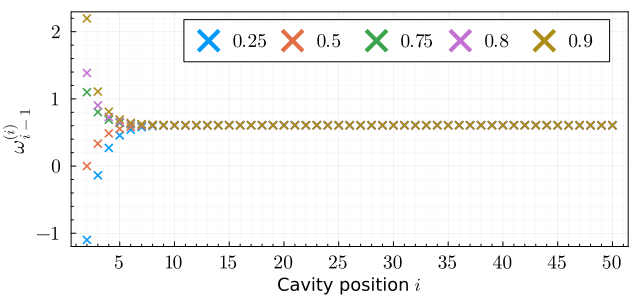

In [2]:
##############
# Parameters #
##############

β = 1/2  # Inverse thermal energy.
h = 1/3  # External magnetic field strength.
N = 50  # Nodes in chain.


###############################
# P(σ1 = +1) with cavity at 2 #
###############################

probabilities = [0.25, 0.5, 0.75, 0.8, 0.9]


#################################
# Plot of ω vs. cavity position #
#################################

cavity_plot = cavity_vs_position(β, h, N, probabilities; up=true);


# General plot attributes
kw =(;
    xlabel=L"Cavity position $i$",
    ylabel="\$ \\omega^{(i)}_{i-1} \$",
    xminorgrid=true,
    yminorgrid=true,
    xminorticks=5,
    yminorticks=5,
    xlabelfontsize=12,
    ylabelfontsize=14,  # Default value is 11.
    legendfontsize=13,
#     legendtitlefontsize=15,
    legend=:topright,
    legend_columns=-1,
    tickfontsize=13,
    framestyle=:box,
    dpi=400,
    size=(640, 300),
    bottommargin=4Plots.mm,
    leftmargin=3Plots.mm
)

plot!(;kw...)

xticks_range = (N > 15) ? (5:5:N) : (0:2:N)
xticks_labs = ["\$ $(k) \$" for k ∈ xticks_range]

yticks_range = -1:2
yticks_labs = ["\$ $(k) \$" for k ∈ yticks_range]

plot!(xticks=(xticks_range, xticks_labs),
      yticks=(yticks_range, yticks_labs),)

# plot!(legendtitle="\$P^{(2)}(\\sigma_{1}=1)\$")


###############
# Save figure #
###############

# Round values to avoid cluttering the labels.
# β_label = round(β, digits=2)
# h_label = round(h, digits=2)

# savefig(cavity_plot, "./Figures/cavity_params_beta_$(β_label)_h_$(h_label).png")